In [2]:
from sklearn import metrics
from sklearn.impute import SimpleImputer 

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import scale, normalize
import matplotlib.pyplot as plt
import random

In [4]:
#Read data into dataframes
training_data = pd.read_csv(r'C:\Users\nakaz\Desktop\cpts 3-415\train.csv')
bot_data = pd.read_csv(r'C:\Users\nakaz\Desktop\cpts 3-415\botdatafilefixed.csv')
nonbot_data = pd.read_csv(r'C:\Users\nakaz\Desktop\cpts 3-415\humandatafilefixed.csv')
test_data = pd.read_csv(r'C:\Users\nakaz\Desktop\cpts 3-415\test.csv')


In [5]:
#Cleaning the data
train_attr = training_data[
    ['user_followers_count', 'user_friends_count', 'user_listed_count', 'favorite_count', 'user_statuses_count', 'user_verified']]
train_label = training_data[['bot']]

test_attr = test_data[
    ['user_followers_count', 'user_friends_count', 'user_listed_count', 'favorite_count', 'user_statuses_count', 'user_verified']]
test_label = test_data[['bot']]

bot_attr = bot_data[
['user_followers_count', 'user_friends_count', 'user_listed_count', 'favorite_count', 'user_statuses_count', 'user_verified']]
bot_label = bot_data[['bot']]

nonbot_attr = nonbot_data[
    ['user_followers_count', 'user_friends_count', 'user_listed_count', 'favorite_count', 'user_statuses_count', 'user_verified']]
nonbot_label = nonbot_data[['bot']]

Y axis in terms of 1,000,000


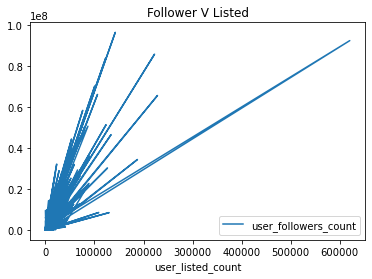

In [6]:
#visualizing data
training_data.plot(x='user_listed_count', y='user_followers_count', title="Follower V Listed")
print('Y axis in terms of 1,000,000')

<AxesSubplot:title={'center':'twitter data'}, xlabel='user_listed_count'>

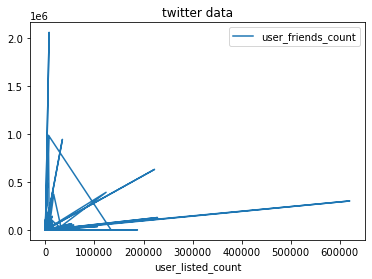

In [7]:
training_data.plot(y='user_friends_count', x='user_listed_count', title="twitter data")


In [8]:
#Normalizing data

train_attr = normalize(train_attr)
test_attr = normalize(test_attr)
bot_attr = normalize(bot_attr)
nonbot_attr = normalize(nonbot_attr)

In [9]:
#Training our classifiers
nb = GaussianNB().fit(train_attr, train_label.to_numpy())
logreg = LogisticRegression().fit(train_attr, train_label.to_numpy())

C:\Users\nakaz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nakaz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [10]:
#Testing test data
actual = np.array(test_label)
predicted = nb.predict(test_attr)
pred = np.array(predicted)



In [11]:
#naive bayes accuracy
accuracy = accuracy_score(actual, pred) * 100
precision = precision_score(actual, pred) * 100
recall = recall_score(actual, pred) * 100
f1 = f1_score(actual, pred)
print('Accuracy is {:.4f}%\nPrecision is {:.4f}%\nRecall is {:.4f}%\nF1 Score is {:.4f}'.format(accuracy, precision, recall, f1))


Accuracy is 88.0000%
Precision is 95.2381%
Recall is 80.0000%
F1 Score is 0.8696


In [12]:
#training and testing logistic regression accuracy
actual = np.array(test_label)
predicted = logreg.predict(test_attr)
pred = np.array(predicted)
accuracy = accuracy_score(actual, pred) * 100
precision = precision_score(actual, pred) * 100
recall = recall_score(actual, pred) * 100
f1 = f1_score(actual, pred)
auc = roc_auc_score(actual, pred)
print('Accuracy is {:.4f}%\nPrecision is {:.4f}%\nRecall is {:.4f}%\nF1 Score is {:.4f}'.format(accuracy, precision, recall, f1))


Accuracy is 81.0000%
Precision is 96.9697%
Recall is 64.0000%
F1 Score is 0.7711


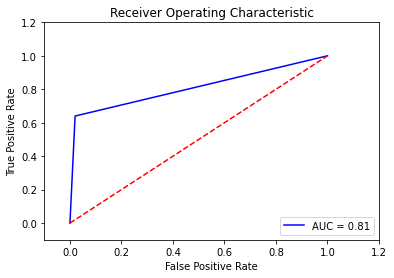

C:\Users\nakaz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [13]:
fpr, tpr, thresholds = metrics.roc_curve(actual, pred)
auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
nb = GaussianNB().fit(train_attr, train_label.to_numpy())

In [14]:
class kfoldsfunction():
    def __init__(self):
        kf = KFold(n_splits=4)

        X = train_attr
        Y = train_label.to_numpy()

        i = 0
        for train_indices, test_indices in kf.split(X):
            i += 1
            train_X = X[train_indices, :]
            train_Y = Y[train_indices]
            test_X = X[test_indices, :]
            test_Y = Y[test_indices]
            nb = GaussianNB().fit(train_X, train_Y)
            pred = nb.predict(test_X)

            accuracy = accuracy_score(test_Y, pred) * 100
            precision = precision_score(test_Y, pred) * 100
            recall = recall_score(test_Y, pred) * 100

            print('For split {}'.format(i))
            print('    Accuracy is {:.4f}%\nPrecision is {:.4f}%\nRecall is {:.4f}%\n'.format(accuracy, precision, recall))
   

In [18]:
#training and testing bots data Naive Bayes
actual = np.array(bot_label)
predicted = nb.predict(bot_attr)
pred = np.array(predicted)
accuracy = accuracy_score(actual, pred) * 100
precision = precision_score(actual, pred) * 100
recall = recall_score(actual, pred) * 100
f1 = f1_score(actual, pred)
print('Accuracy is {:.4f}%\nPrecision is {:.4f}%\nRecall is {:.4f}%\nF1 Score is {:.4f}'.format(accuracy, precision, recall, f1))


Accuracy is 93.2665%
Precision is 100.0000%
Recall is 93.2665%
F1 Score is 0.9652


In [15]:
#training and testing bots data logistic regresison


actual = np.array(bot_label)
predicted = logreg.predict(bot_attr)
pred = np.array(predicted)
accuracy = accuracy_score(actual, pred) * 100
precision = precision_score(actual, pred) * 100
recall = recall_score(actual, pred) * 100
f1 = f1_score(actual, pred)
print('Accuracy is {:.4f}%\nPrecision is {:.4f}%\nRecall is {:.4f}%\nF1 Score is {:.4f}'.format(accuracy, precision, recall, f1))


Accuracy is 88.3954%
Precision is 100.0000%
Recall is 88.3954%
F1 Score is 0.9384


In [16]:
#testing non bot data 
actual = np.array(nonbot_label)
predicted = nb.predict(nonbot_attr)
pred = np.array(predicted)

In [17]:
accuracy = accuracy_score(actual, pred) * 100
precision = precision_score(actual, pred) * 100
recall = recall_score(actual, pred) * 100
f1 = f1_score(actual, pred)

C:\Users\nakaz\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
accuracy = accuracy_score(actual, pred) * 100
precision = precision_score(actual, pred) * 100
recall = recall_score(actual, pred) * 100
f1 = f1_score(actual, pred)
print('Accuracy is {:.4f}%\nPrecision is {:.4f}%\n\
Recall is {:.4f}%\nF1 Score is {:.4f}'.format(accuracy, precision, recall, f1))

Accuracy is 4.2042%
Precision is 0.0000%
Recall is 0.0000%
F1 Score is 0.0000


C:\Users\nakaz\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
#training and testing nonbot data logistic regression
actual = np.array(nonbot_label)
predicted = logreg.predict(nonbot_attr)
pred = np.array(predicted)
accuracy = accuracy_score(actual, pred) * 100
precision = precision_score(actual, pred) * 100
recall = recall_score(actual, pred) * 100
f1 = f1_score(actual, pred)
print('Accuracy is {:.4f}%\nPrecision is {:.4f}%\n\
Recall is {:.4f}%\nF1 Score is {:.4f}'.format(accuracy, precision, recall, f1))

Accuracy is 11.4114%
Precision is 0.0000%
Recall is 0.0000%
F1 Score is 0.0000


C:\Users\nakaz\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
train_X, test_X, train_Y, test_Y = train_test_split(train_attr, train_label, test_size=0.4, random_state=0)

nb = GaussianNB().fit(train_X, train_Y)

actual = np.array(test_Y)
predicted = nb.predict(test_X)
pred = np.array(predicted)

accuracy = accuracy_score(actual, pred) * 100
precision = precision_score(actual, pred) * 100
recall = recall_score(actual, pred) * 100
f1 = f1_score(actual, pred)
auc = roc_auc_score(actual, pred)
print('Accuracy is {:.4f}%\nPrecision is {:.4f}%\nRecall is {:.4f}%\nF1 Score is {:.4f}\nArea Under Curve is {:.4f}'.format(accuracy, precision, recall, f1, auc))

Accuracy is 75.1564%
Precision is 68.4573%
Recall is 91.0256%
F1 Score is 0.7814
Area Under Curve is 0.7553


C:\Users\nakaz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [41]:
#testing Kfolds
kfolds = kfoldsfunction()

For split 1
    Accuracy is 88.0000%
Precision is 100.0000%
Recall is 88.0000%

For split 2
    Accuracy is 85.5508%
Precision is 96.0993%
Recall is 87.2786%

For split 3
    Accuracy is 61.3734%
Precision is 0.0000%
Recall is 0.0000%

For split 4
    Accuracy is 56.9385%
Precision is 0.0000%
Recall is 0.0000%



C:\Users\nakaz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nakaz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nakaz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nakaz\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(a

In [42]:
nb = GaussianNB().fit(train_attr, train_label.to_numpy())

C:\Users\nakaz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [43]:
test_data = pd.read_csv(r'C:\Users\nakaz\Desktop\cpts 3-415\testfilefixed.csv')
test_attr = test_data[
    ['user_followers_count', 'user_friends_count', 'user_listed_count', 'favorite_count', 'user_statuses_count', 'user_verified']]




test_attr['user_followers_count'] = test_attr['user_followers_count'].astype(np.float64)
test_attr['user_friends_count'] = test_attr['user_friends_count'].astype(np.float64)
test_attr['user_listed_count'] = test_attr['user_listed_count'].astype(np.float64)
test_attr['favorite_count'] = test_attr['favorite_count'].astype(np.float64)
test_attr['user_statuses_count'] = test_attr['user_statuses_count'].astype(np.float64)
test_attr['user_verified'] = np.where(test_attr['user_verified'] == 'TRUE', True, False)
imp = SimpleImputer(missing_values=np.NAN, strategy='mean', fill_value=None, verbose=0, copy=True)
test_attr = imp.fit_transform(test_attr)

pred = nb.predict(test_attr)

C:\Users\nakaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nakaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\nakaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [44]:
training_data = pd.read_csv(r'C:\Users\nakaz\Desktop\cpts 3-415\train.csv')

train_label = training_data[['bot']]
test_data = pd.read_csv(r'C:\Users\nakaz\Desktop\cpts 3-415\testfilefixed.csv')

test_label = test_data[['bot']]

In [45]:
train_X, test_X, train_Y, test_Y = train_test_split(training_data, train_label, test_size=0.4, random_state=0)

X = train_X[['user_followers_count', 'user_friends_count', 'user_listed_count', 'favorite_count', 'user_statuses_count', 'user_verified']]
Y = train_Y

X = normalize(X)
Y = normalize(Y)

nb = GaussianNB().fit(X, Y)

Z = test_X[['user_followers_count', 'user_friends_count', 'user_listed_count', 'favorite_count', 'user_statuses_count', 'user_verified']]
Z = normalize(Z)
actual = np.array(test_Y)
predicted = nb.predict(Z)
pred = np.array(predicted)

C:\Users\nakaz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [46]:
sc = test_X['user_screen_name'].to_numpy()
i = 0
for name in sc:
    if 'bot' in name or 'Bot' in name or 'bOt' in name or 'boT' in name or 'BOT' in name or 'BOt' in name or 'BoT' in name or 'bOT' in name:
        pred[i] = 1
    i += 1

pred

array([0., 1., 1., ..., 1., 1., 0.])

In [47]:
with open('415result.txt', 'w') as f:
    for item in pred:
        f.write("%s\n" % item)

In [66]:
kf = KFold(n_splits=4)

X = train_attr
Y = train_label.to_numpy()

i = 0
for train_indices, test_indices in kf.split(X):
    i += 1
    train_X = X[train_indices, :]
    train_Y = Y[train_indices]
    test_X = X[test_indices, :]
    test_Y = Y[test_indices]
    logreg = LogisticRegression().fit(train_X, train_Y)
    pred = logreg.predict(test_X)
    
    accuracy = accuracy_score(test_Y, pred) * 100
    precision = precision_score(test_Y, pred) * 100
    recall = recall_score(test_Y, pred) * 100
    print('For split {}'.format(i))
    print('    Accuracy is {:.4f}%\nPrecision is {:.4f}%\nRecall is {:.4f}%\n'.format(accuracy, precision, recall))


For split 1
    Accuracy is 68.1429%
Precision is 100.0000%
Recall is 68.1429%

For split 2
    Accuracy is 69.9571%
Precision is 98.3529%
Recall is 67.3108%

For split 3
    Accuracy is 68.2403%
Precision is 0.0000%
Recall is 0.0000%

For split 4
    Accuracy is 66.0944%
Precision is 0.0000%
Recall is 0.0000%



C:\Users\nakaz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nakaz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nakaz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nakaz\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(a